# Measured string order parameter ⟨Oz⟩ for quantum states in antiferromagnetic and symmetry-protected topological phases

In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import os
import h5py
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [2]:
file_path_now = os.getcwd()
print(file_path_now)
file_path = os.path.dirname(file_path_now)  
print(file_path)
file_path = os.path.dirname(file_path)  
print(file_path)

def df_to_dict(df):
    res={}
    keys=list(df.keys())
    for k in keys:
        try:
            for column in df[k].columns:
                if column.startswith('Unnamed'):
                    pass
                else:
                    res[column]=df[k][column]
        except:
                if k.startswith('Unnamed'):
                    pass
                else:
                    res[k]=df[k]
    return res
ENCODE_medical_wk_DATAPATH = file_path + "/Experimental_Results/data/train_data/MedNIST_hand_breast_wk.mat"
def load_medical_wk_encode_data():
    h5_file = h5py.File(ENCODE_medical_wk_DATAPATH, mode="r")
    data = {}
    for dataset in h5_file.keys():
        data[dataset] = h5_file[dataset][()]
    return data
FashionMNIST_09_DATAPATH = file_path + "/Experimental_Results/data/train_data/FashionMNIST_0-9.mat"
def load_FashionMNIST_09_encode_data():
    h5_file = h5py.File(FashionMNIST_09_DATAPATH, mode="r")
    data = {}
    for dataset in h5_file.keys():
        data[dataset] = h5_file[dataset][()]
    return data

data_FS=load_FashionMNIST_09_encode_data()
data_MD= load_medical_wk_encode_data()

/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning/Experimental_Results/Methods
/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning/Experimental_Results
/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning


In [3]:
df_oz_my = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_spt_oz_my.xlsx',sheet_name=['oz','my'])
dict_oz_my=df_to_dict(df_oz_my)

h_1 = dict_oz_my['h'][np.where(dict_oz_my['h']<1)[0]]
Oz_1 = dict_oz_my['Oz'][np.where(dict_oz_my['h']<1)[0]]
h_2 = dict_oz_my['h'][np.where(dict_oz_my['h']>1)[0]]
Oz_2 = dict_oz_my['Oz'][np.where(dict_oz_my['h']>1)[0]]

In [4]:
h_ideal1=np.arange(0,1,0.05)
oz_ideal=(1-h_ideal1**2)**(3/4)
h_ideal2=np.arange(1.0,3,0.05)
oz_ideal2=0*h_ideal2
oz_ideal=np.hstack([oz_ideal,oz_ideal2])

h_ideal=np.arange(0,3,0.05)

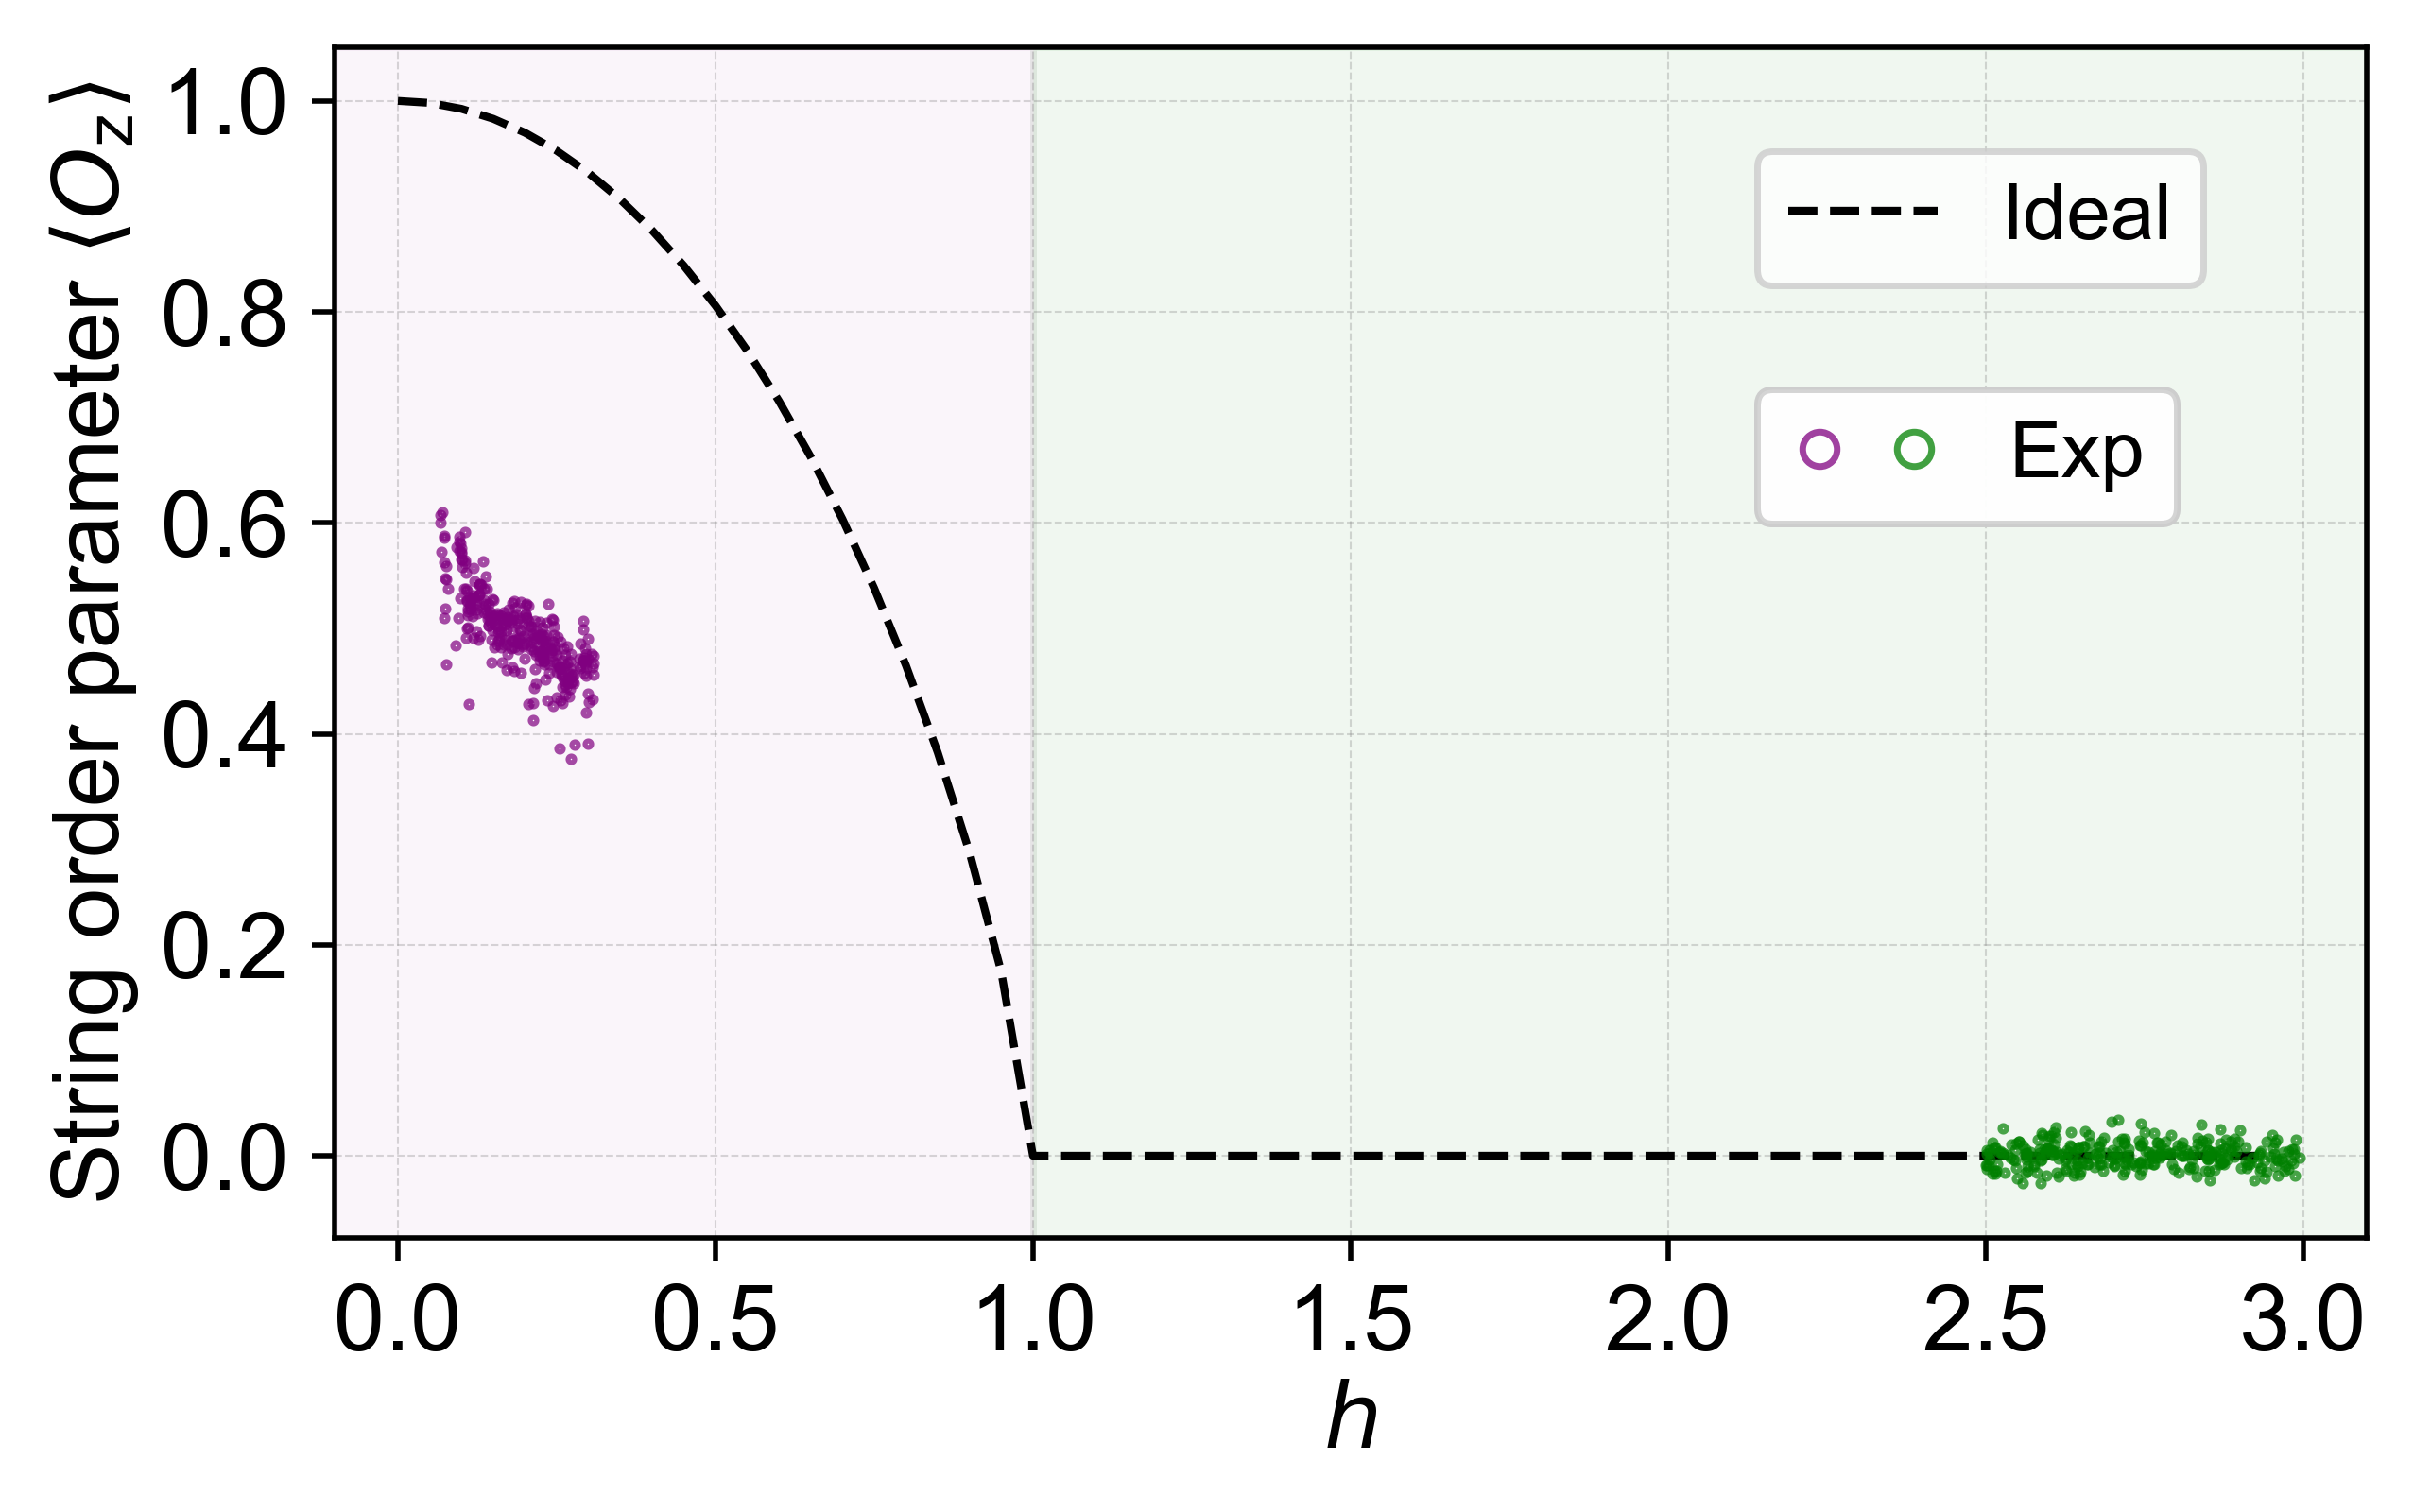

In [5]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots( dpi=500 )

ax.set_xlim([-0.1, 3.1])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.3)


plot0, = ax.plot(h_ideal, oz_ideal,color='black',linestyle='--',linewidth=1.2,label='Ideal')
plot1, = ax.plot(np.array(h_1), np.array(Oz_1), color='purple', alpha=0.7, linestyle='None',marker='.',
        mfc='None', markersize=1.5, label='Exp' )
plot2, = ax.plot(np.array(h_2), np.array(Oz_2), color='green', alpha=0.7, linestyle='None', marker='.',mfc='None',
        markersize=1.5, label='Exp')


handles = [(plot1, plot2)];  labels = ['Exp']

legend_0 = ax.legend(frameon=True, handles=[plot0], handlelength=1.9, loc=(0.7, 0.8), fontsize=12)

legend_1 = ax.legend(frameon=True, handles=handles, labels=labels, markerscale=7, loc=(0.7, 0.6), handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=12)

ax.add_artist(legend_0)
ax.add_artist(legend_1)

# ax.legend(frameon=False, loc=(0.7, 0.65), labelspacing=0.6, handlelength=1.7, markerscale=6, fontsize=11)


ax.set_xlabel('$h$', labelpad = 2) 
ax.set_ylabel(r'String order parameter $\langle O_{\text{z}}\rangle$', labelpad = 3) 

ax.axvspan(-0.1, 1, color = 'purple', alpha=0.04)
ax.axvspan(1, 3.1, color =  'green', alpha=0.06)

plt.tight_layout()
plt.subplots_adjust(left = 0.13, bottom = 0.15, top = 0.99, right = 0.99) 
plt.show()

In [ ]:
fig.savefig('measured_Oz.pdf', format='pdf', facecolor='None')